In [9]:
import pandas as pd
import numpy as np

In [10]:
data = pd.read_csv("../lectures/data/beer_reviews.csv")

In [11]:
pd.options.display.max_rows=8

In [12]:
data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061
1586613,14359,The Defiant Brewing Company,1160005319,5.0,4.5,4.5,cbl2,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


#### 1. Group the reviews by beer style. How many styles are there?


In [13]:
groupped_by_style = data.groupby('beer_style')

In [14]:
len(groupped_by_style)

104

#### 2.Plot the distribution of number of reviews in each style.


In [15]:
import matplotlib.pyplot as plt

In [16]:
n_reviews = groupped_by_style.apply(lambda g: len(g))

In [17]:
n_reviews

beer_style
Altbier                        7741
American Adjunct Lager        30749
American Amber / Red Ale      45751
American Amber / Red Lager     9311
                              ...  
Weizenbock                     9412
Wheatwine                      3714
Winter Warmer                 20661
Witbier                       30140
Length: 104, dtype: int64

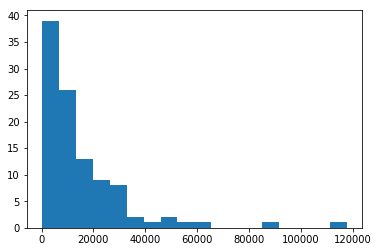

In [18]:
plt.hist(n_reviews, bins="auto")
plt.show()

#### 3.Propose a suitable score to rank beers according to both aroma and appearance.

In [19]:
data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061
1586613,14359,The Defiant Brewing Company,1160005319,5.0,4.5,4.5,cbl2,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [20]:
data.review_aroma.describe()

count    1.586614e+06
mean     3.735636e+00
std      6.976167e-01
min      1.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: review_aroma, dtype: float64

In [21]:
data.review_appearance.describe()

count    1.586614e+06
mean     3.841642e+00
std      6.160928e-01
min      0.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: review_appearance, dtype: float64

In [22]:
# Both are very similar 
score = 0.5*data.review_aroma + 0.5*data.review_appearance

In [23]:
data['score'] = score

In [24]:
data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,score
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,2.25
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,2.75
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,2.75
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061,3.75
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061,3.25
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061,4.50
1586613,14359,The Defiant Brewing Company,1160005319,5.0,4.5,4.5,cbl2,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061,4.50


#### 4.Calculate the average score for each style.

In [25]:
reviews_by_style = data.groupby('beer_style')

In [26]:
avg_score = reviews_by_style['score'].aggregate(np.average)

In [27]:
avg_score

beer_style
Altbier                       3.716671
American Adjunct Lager        2.634378
American Amber / Red Ale      3.718722
American Amber / Red Lager    3.370395
                                ...   
Weizenbock                    4.026987
Wheatwine                     3.938072
Winter Warmer                 3.775906
Witbier                       3.663786
Name: score, Length: 104, dtype: float64

#### 6. Group reviews by beers first and calculate mean score for each beer, then group by style.

In [28]:
beers = data[
    ['beer_beerid', 'brewery_id', 'brewery_name', 
     'beer_style', 'beer_name', 'beer_abv', 'score']
]

In [29]:
mean_score = beers.groupby(['beer_name', 'beer_style'])['score'].aggregate(np.mean)

In [30]:
mean_score

beer_name                        beer_style             
! (Old Ale)                      Old Ale                    4.250
"100"                            Belgian Dark Ale           4.000
"100" Pale Ale                   American IPA               3.750
"12"  Belgian Golden Strong Ale  Belgian Strong Pale Ale    3.875
                                                            ...  
Ω-naught (Omeganaught)           American IPA               4.000
“Chewy” Double IPA               American IPA               3.000
横須賀ビアサケ (Yokosuka Biasake)       English Bitter             3.250
葉山ビール (Hayama Beer)              English Bitter             3.000
Name: score, Length: 58892, dtype: float64

#### 7. Plot the distribution of number of beers in each style.

In [31]:
mean_score_by_style = mean_score.groupby('beer_style')

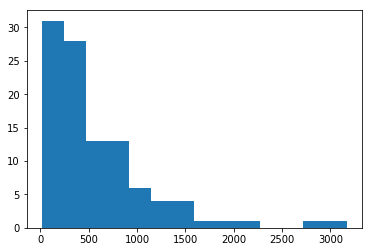

In [32]:
plt.hist(mean_score_by_style.size(), bins="auto")
plt.show()

#### 8. Choose the best styles using same criterion as previously. Are the results the same? If not, why?

In [33]:
mean_score_by_style.mean().sort_values(ascending=False)

beer_style
Russian Imperial Stout              4.026397
American Double / Imperial Stout    4.022714
Lambic - Unblended                  3.994425
American Double / Imperial IPA      3.953622
                                      ...   
American Malt Liquor                2.754393
Light Lager                         2.693881
American Adjunct Lager              2.691338
Happoshu                            2.598530
Name: score, Length: 104, dtype: float64